In [2]:
from fastai import * 
from fastai.vision import *
from fastai.callbacks import *

In [3]:
path = Path('./')
path.ls()

[PosixPath('dataset.zip'),
 PosixPath('models'),
 PosixPath('README.md'),
 PosixPath('.gitignore'),
 PosixPath('dataset'),
 PosixPath('Network_training.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('cleaned.csv'),
 PosixPath('.git')]

In [4]:
np.random.seed(69)

bs = 16

data = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
        .split_by_rand_pct(0.2)
        .label_from_df()
        .transform(get_transforms(), size=224)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

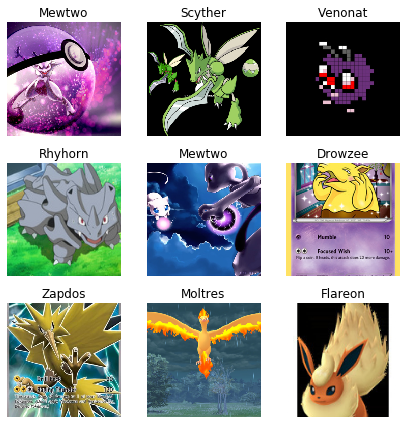

In [8]:
data.show_batch(rows=3, figsize=(6,6), ds_type= DatasetType.Valid)

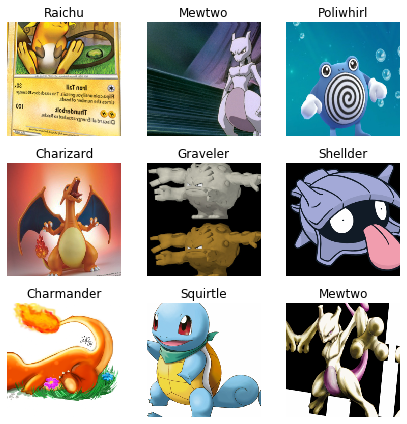

In [9]:
data.show_batch(rows=3, figsize=(6,6), ds_type= DatasetType.Train)

In [5]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

In [12]:
len(learn.data.train_ds)

5016

In [13]:
len(learn.data.valid_ds)

1253

In [14]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.98E-03


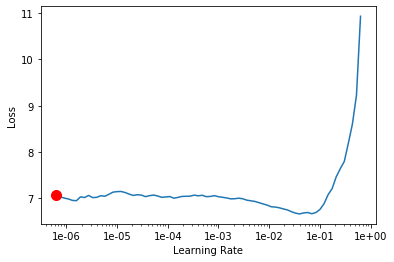

In [16]:
learn.recorder.plot(suggestion=True)

In [21]:
learn.load('pokeBot1');

In [22]:
lr = 1e-2

learn.fit_one_cycle(15, max_lr=slice(lr), 
                   callbacks=SaveModelCallback(learn, monitor="accuracy", every="improvement", name="pokeBot1"))

epoch,train_loss,valid_loss,accuracy,time
0,1.434035,0.939310,0.762969,00:47
1,1.550838,1.134611,0.717478,00:47
2,1.921555,1.370140,0.674381,00:49
3,1.818978,1.143226,0.718276,00:50
4,1.498419,0.923469,0.755786,00:52
5,1.204301,0.875532,0.776536,00:48
6,1.095110,0.775310,0.798883,00:47
7,0.959086,0.685441,0.825219,00:47
8,0.839838,0.691693,0.830008,00:47
9,0.641531,0.649942,0.849960,00:48


Better model found at epoch 0 with accuracy value: 0.762968897819519.
Better model found at epoch 5 with accuracy value: 0.7765362858772278.
Better model found at epoch 6 with accuracy value: 0.7988826632499695.
Better model found at epoch 7 with accuracy value: 0.825219452381134.
Better model found at epoch 8 with accuracy value: 0.8300079703330994.
Better model found at epoch 9 with accuracy value: 0.8499600887298584.
Better model found at epoch 10 with accuracy value: 0.8555467128753662.
Better model found at epoch 11 with accuracy value: 0.8611332774162292.
Better model found at epoch 13 with accuracy value: 0.8794892430305481.


In [28]:
learn.load('pokeBot1');

In [29]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06
Min loss divided by 10: 9.12E-04


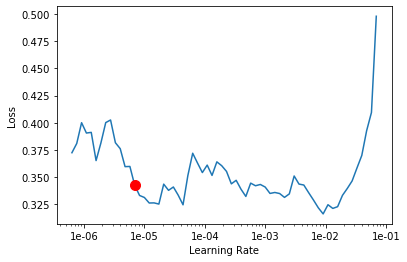

In [30]:
learn.recorder.plot(suggestion=True)

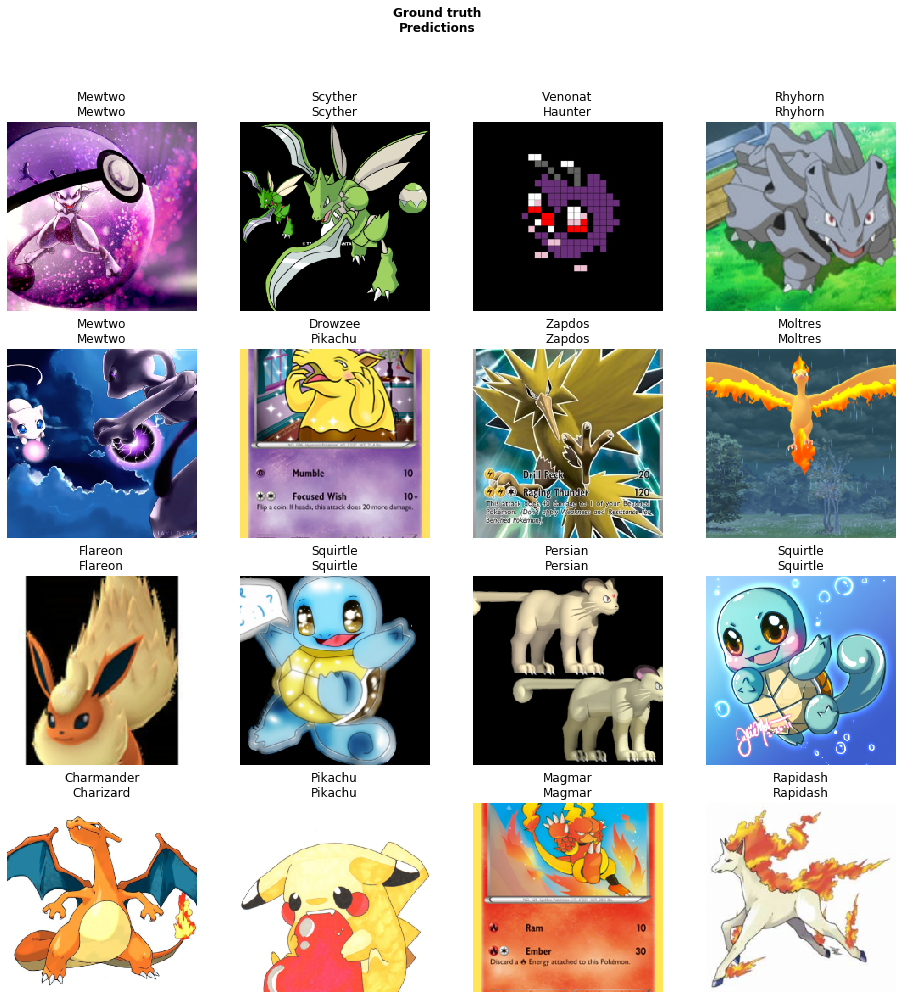

In [31]:
learn.show_results()

In [33]:
lr = slice(7e-6, 1e-3)

learn.fit_one_cycle(15, max_lr=lr, 
                   callbacks=SaveModelCallback(learn, monitor="accuracy", every="improvement", name="pokeBot2"))

epoch,train_loss,valid_loss,accuracy,time
0,0.325694,0.557952,0.869912,00:48
1,0.369252,0.541969,0.876297,00:46
2,0.304918,0.548043,0.869114,00:47
3,0.349748,0.537911,0.873903,00:47
4,0.306884,0.545108,0.881884,00:47
5,0.296629,0.543261,0.881085,00:47
6,0.325707,0.541641,0.876297,00:48
7,0.292070,0.539399,0.881085,00:46
8,0.259430,0.542068,0.877095,00:47
9,0.301307,0.536174,0.883480,00:47


Better model found at epoch 0 with accuracy value: 0.8699122071266174.
Better model found at epoch 1 with accuracy value: 0.876296877861023.
Better model found at epoch 4 with accuracy value: 0.8818835020065308.
Better model found at epoch 9 with accuracy value: 0.883479654788971.
Better model found at epoch 11 with accuracy value: 0.8850758075714111.


In [6]:
learn.load('pokeBot2');

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

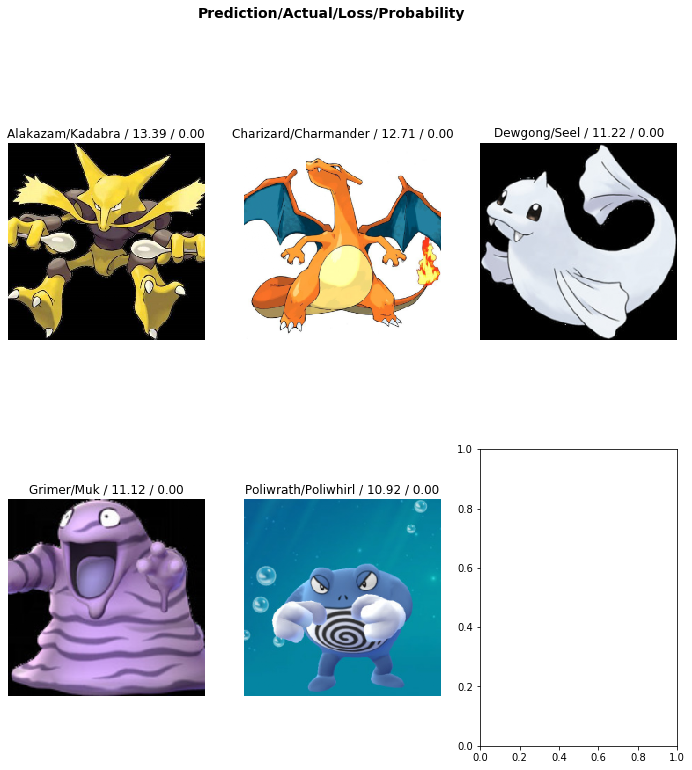

In [9]:
interp.plot_top_losses(5)

In [10]:
learn.export("pokeBot.pkl")